--------------------
<font size=6 color=darkgoldenrod> KAGGLE NOTEBOOK :
<font size=4 color=wheat> TITANIC DATASET

-------------------

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

-------------------------
<font size = 5 color = lightblue ><b> Importing Dataset into the Notebook

------------------------

In [2]:
# importing dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [3]:
# Snapshot of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check out the Structure/info about the data
print(f'Shape\t\t: {df.shape}')
print(f'Row Labels\t: {df.index}')
print(f'\nColumn Labels:\n {df.columns}')
print(f'\nColumn Data Types:\n {df.dtypes}')

Shape		: (891, 12)
Row Labels	: RangeIndex(start=0, stop=891, step=1)

Column Labels:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Column Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


------------------
<font size = 4 color = orange ><b> Detect Missing Values

------------------------

In [6]:
df.isna() #returns True or False for each value

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isna().sum(axis=0) #column-wise sum

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
# Getting the ercentage of missing values
(df.isna().sum() / df.shape[0] * 100).round(2)

,0
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


<font size=3 color=aqua>If a column has more than 30% --> Delete the Column

-----------------
<font size=4 color=orange> Target Column Analysis

---------------

In [9]:
# Calculating the number of people survived
vc = df.Survived.value_counts()
vc

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived'>

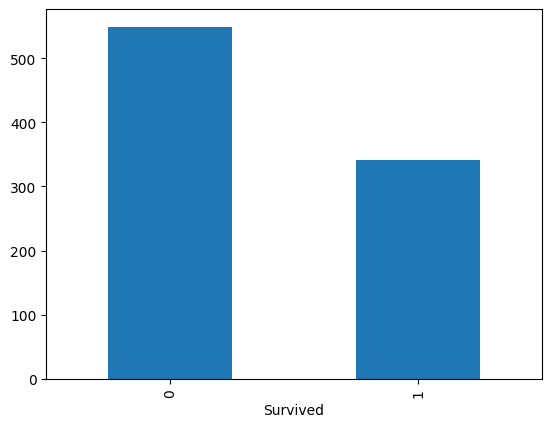

In [10]:
# for visual presentation of survived people
vc.plot.bar()

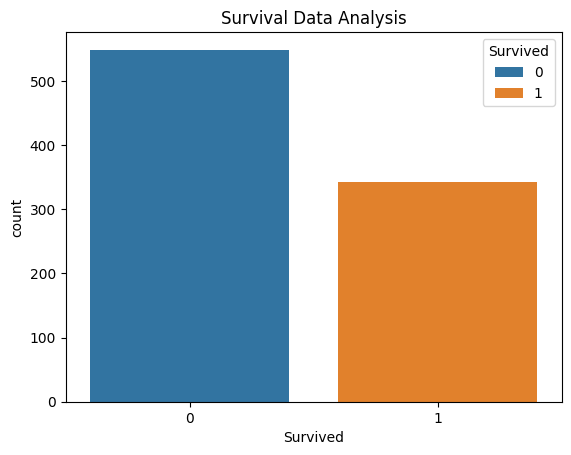

In [11]:
sns.countplot(x='Survived',hue='Survived', data=df)
plt.title('Survival Data Analysis')
plt.show()

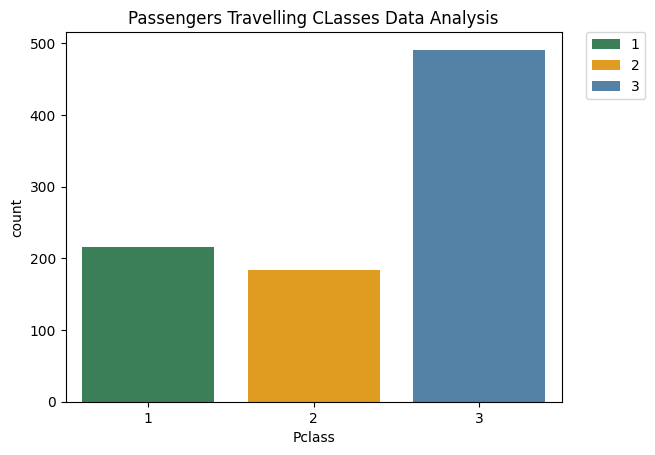

In [12]:
sns.countplot(x='Pclass',hue='Pclass', data=df, palette= ['seagreen','orange','steelblue'] )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('Passengers Travelling CLasses Data Analysis')
plt.show()

In [13]:
df.Age.mean()

np.float64(29.69911764705882)

In [14]:
df.groupby('Sex')[['Age']].agg(['mean','median','min','max']).round(2)

Age                   
         mean median   min   max
Sex                             
female  27.92   27.0  0.75  63.0
male    30.73   29.0  0.42  80.0

In [15]:
# Replacing missing values under Age column with the median
df.fillna(df['Age'].median(), inplace=True)

In [16]:
# Drop the Cabin column for data quality + model utility
df.drop('Cabin', axis=1, inplace=True)

In [17]:
# Replacing Missing values of Embarked with mode
df.fillna(df['Embarked'].mode()[0], inplace=True)

In [18]:
# Recheck the Values
df.isna().sum(axis=0)

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


---------------
<font size = 5 color = lightblue ><b> Feature Engineering

-----------------

<font size = 3 color = lightgreen>**Titles like "Mr.", "Miss", "Dr." are present in the Name column. These can signal social status or gender—which affects the chances of survival.**

In [19]:
# Extraction of Title
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1879114478.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


<font size =3 color = lightgreen>**The number of family members traveling with a passenger can be important for survival (group effect).**

In [20]:
# Combination for family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,1


In [21]:
pd.crosstab(df.Sex,df.Title, values=df.Survived, aggfunc='mean').style.background_gradient(cmap='coolwarm')

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,nan,nan,1.000000,nan,1.000000,nan,1.000000,nan,nan,0.697802,1.000000,1.000000,nan,0.792000,1.000000,nan,nan
male,0.000000,0.500000,nan,0.000000,0.333333,0.000000,nan,0.500000,0.575000,nan,nan,nan,0.156673,nan,nan,0.000000,1.000000


In [48]:
df['Age Category'] = ''
df.loc[df.Title.isin(['capt','Major','Don','Jonkheer','Sir','Col','Mr','Rev']),'Age Category']= 'Adult Males'
df.loc[df.Title.isin(['Lady','Mlle','Mme','Mrs','Ms','Countess']),'Age Category']= 'Adult Females'
df.loc[df.Title.isin(['Master']),'Age Category']= 'Young Males'
df.loc[df.Title.isin(['Miss']),'Age Category']= 'Young Female'
df.loc[(df.Title == 'Dr') & (df.Sex == 'female'),'Age Category' ] = 'Adult Females'
df.loc[(df.Title == 'Dr') & (df.Sex == 'male'),'Age Category'] = 'Adult Males'
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,IsAlone,Age Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,2,0,Adult Males
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,2,0,Adult Females
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1,1,Young Female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,2,0,Adult Females
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,1,1,Adult Males


In [49]:
df.groupby('Age Category')[['Age']].agg(['mean','median',lambda x: x.isna().sum() ]).round(2)

Age                  
                mean median <lambda_0>
Age Category                          
               70.00   70.0          0
Adult Females  34.72   32.5          0
Adult Males    31.80   28.0          0
Young Female   23.01   24.0          0
Young Males     6.92    4.0          0

<font size = 3 color = lightgreen>**The survival pattern of people who travel alone can be different.**

In [22]:
# Flagging (Binary indicators)
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,1,1


--------------------
<font size = 5 color = lightblue><b> Exploratory Data Analysis

---------------------

In [23]:
## Check out the dataset
print(f'Shape of the dataset\t\t: {df.shape}')
print(f'\nColumns in the Data\n : {df.columns}')
print(f'\nData Types\n : {df.dtypes}')
print(f'\nOverview of the Data:\n {df.describe()}')
print(f'\nEmpty Data:\n {df.isna().sum().sort_values(ascending=False)}')

Shape of the dataset		: (891, 14)

Columns in the Data
 : Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title', 'FamilySize',
       'IsAlone'],
      dtype='object')

Data Types
 : PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Title           object
FamilySize       int64
IsAlone          int64
dtype: object

Overview of the Data:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000  

--------------------
### Univariate Analysis (Distribution)

------------------------

<font size = 3 color = yellow>Goal: Spot skewness, outliers, dominant categories.


In [24]:
df[['Age','Fare']].describe()

,Age,Fare
count,891.000000,891.000000
mean,29.361582,32.204208
std,13.019697,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,28.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


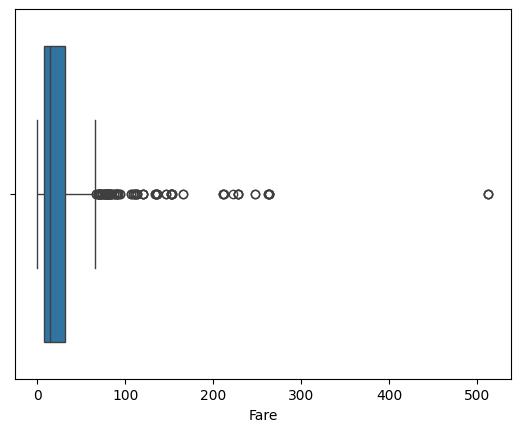

In [25]:
sns.boxplot(x= 'Fare', data=df)
plt.show()

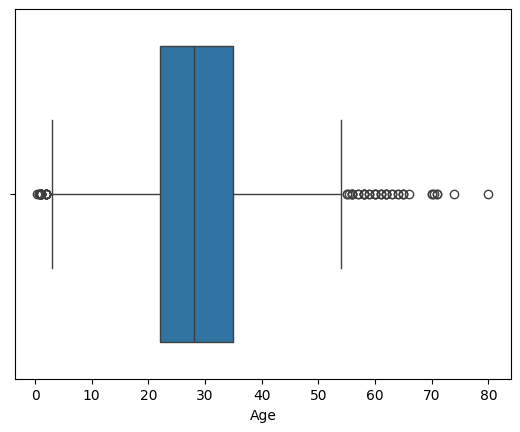

In [26]:
sns.boxplot(x= 'Age', data=df)
plt.show()

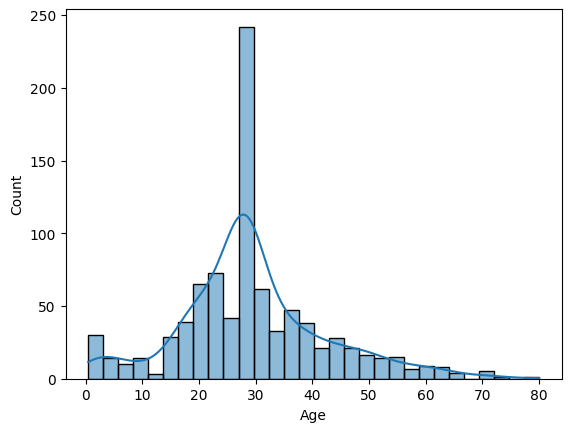

In [27]:
sns.histplot(x='Age',data=df, kde=True)
plt.show()

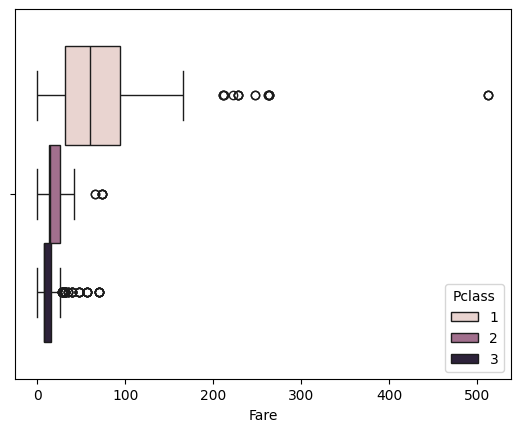

In [28]:
sns.boxplot(x='Fare', hue='Pclass', data=df)
plt.show()

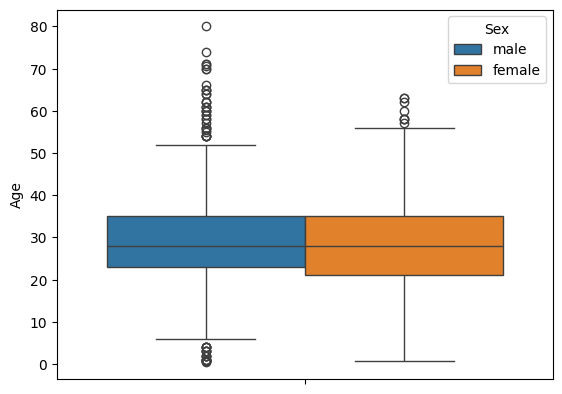

In [29]:
sns.boxplot(y='Age', hue='Sex', data=df)
plt.show()

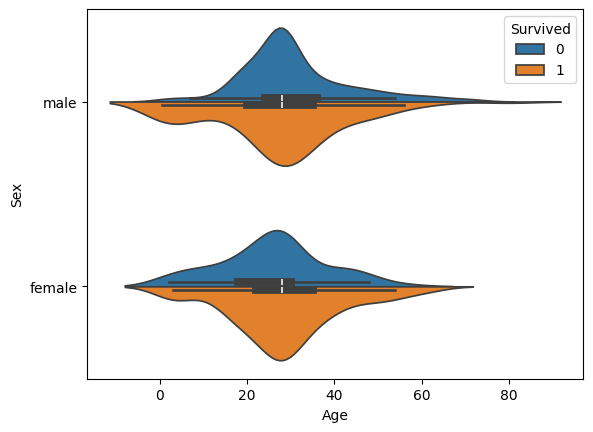

In [30]:
sns.violinplot(x='Age',y='Sex', hue='Survived',split=True, data=df)
plt.show()

In [31]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

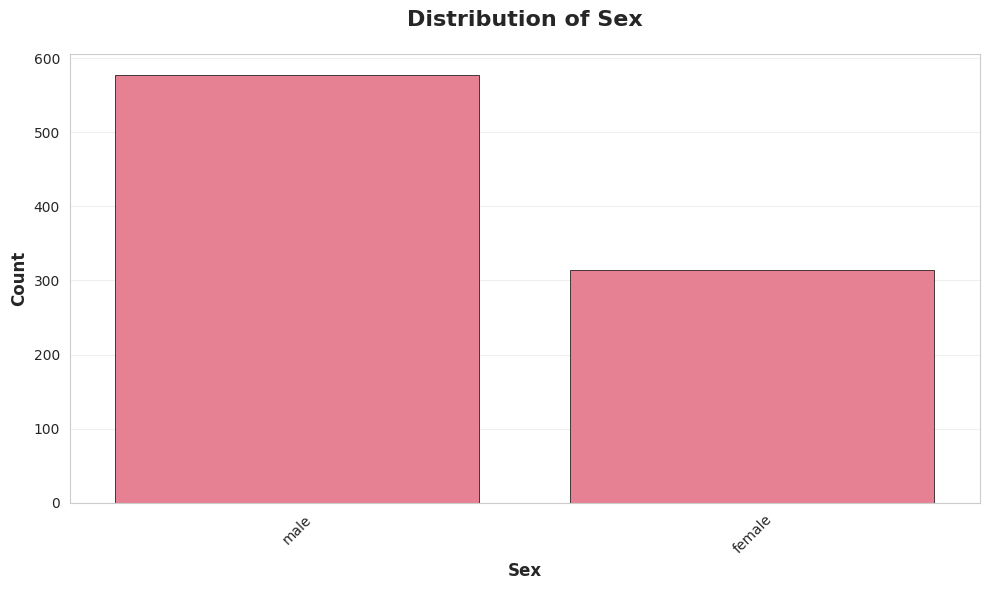

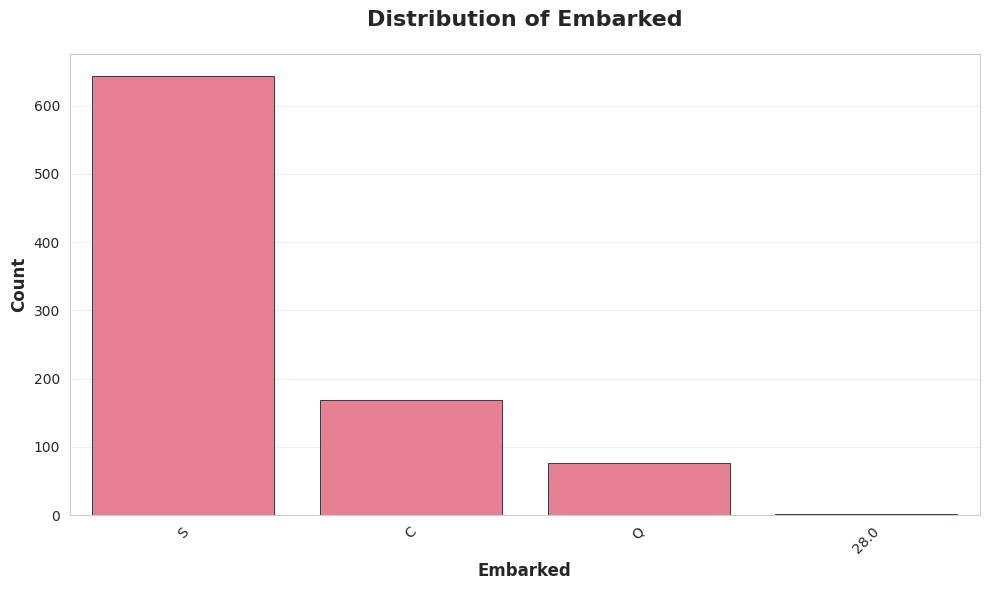

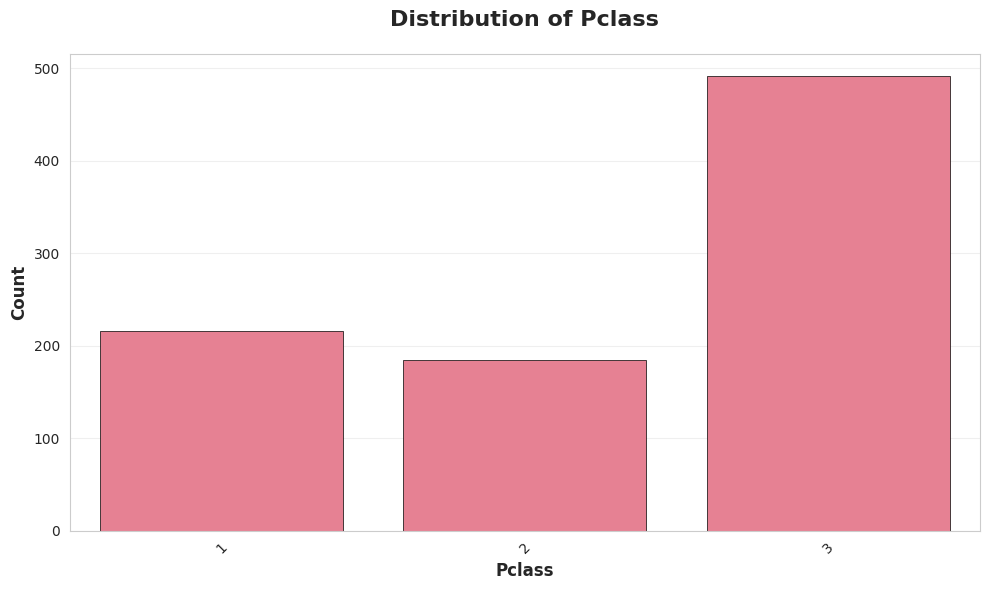

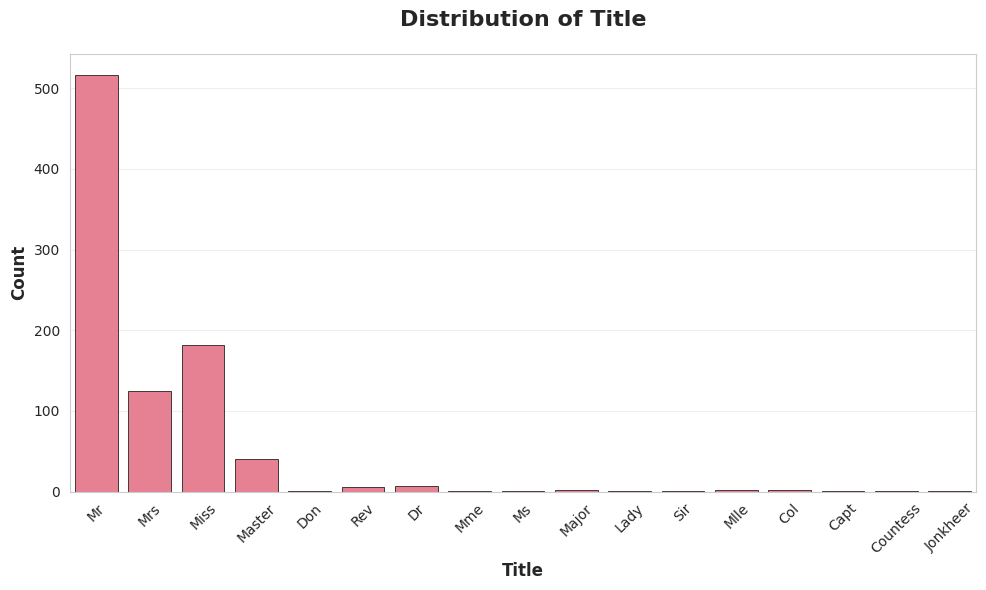

In [32]:
# Set a consistent style and palette for attractiveness
sns.set_style("whitegrid")
sns.set_palette("husl")

# Loop through the columns to create enhanced countplots
for col in ['Sex', 'Embarked', 'Pclass', 'Title']:
    plt.figure(figsize=(10, 6))  # Set a larger figure size for better visibility
    sns.countplot(x=col, data=df, edgecolor='black', linewidth=0.5)  # Add edges for definition

    # Customize title and labels
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel(col, fontsize=12, fontweight='bold')
    plt.ylabel('Count', fontsize=12, fontweight='bold')

    # Rotate x-labels if needed (useful for longer labels like Embarked)
    plt.xticks(rotation=45)

    # Add a subtle grid for readability
    plt.grid(axis='y', alpha=0.3)

    # Tight layout to prevent clipping
    plt.tight_layout()
    plt.show()


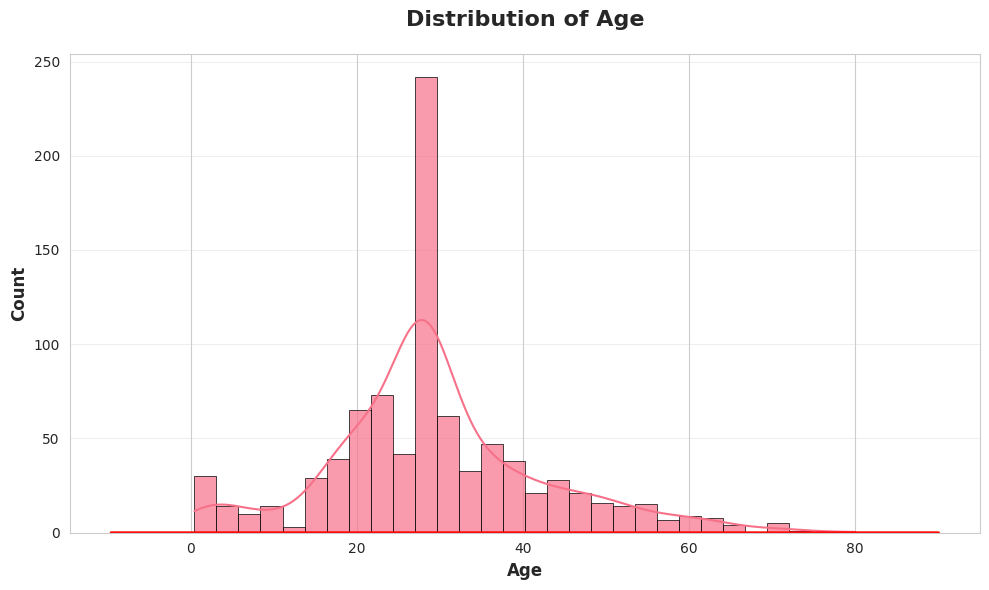

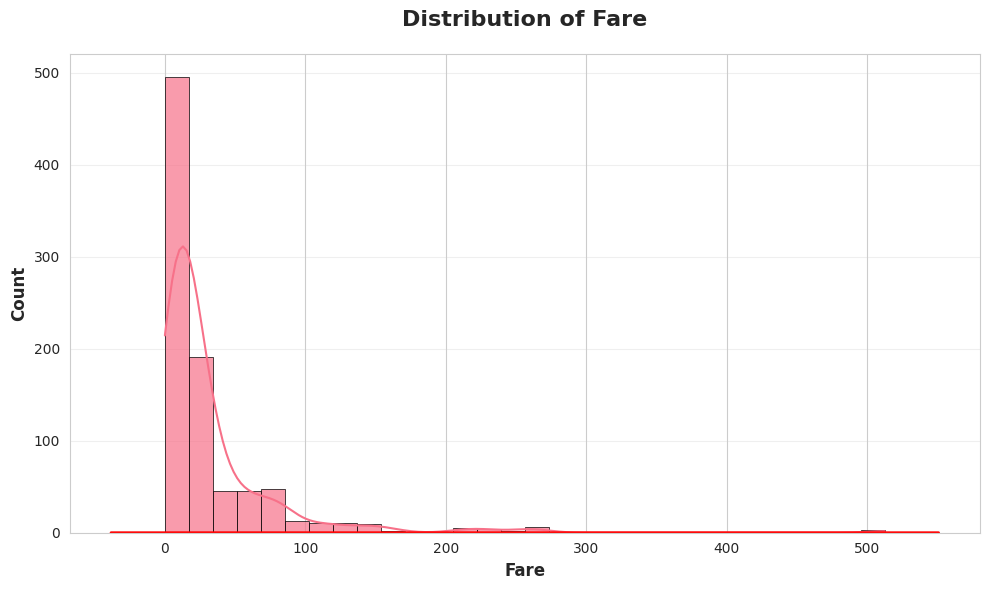

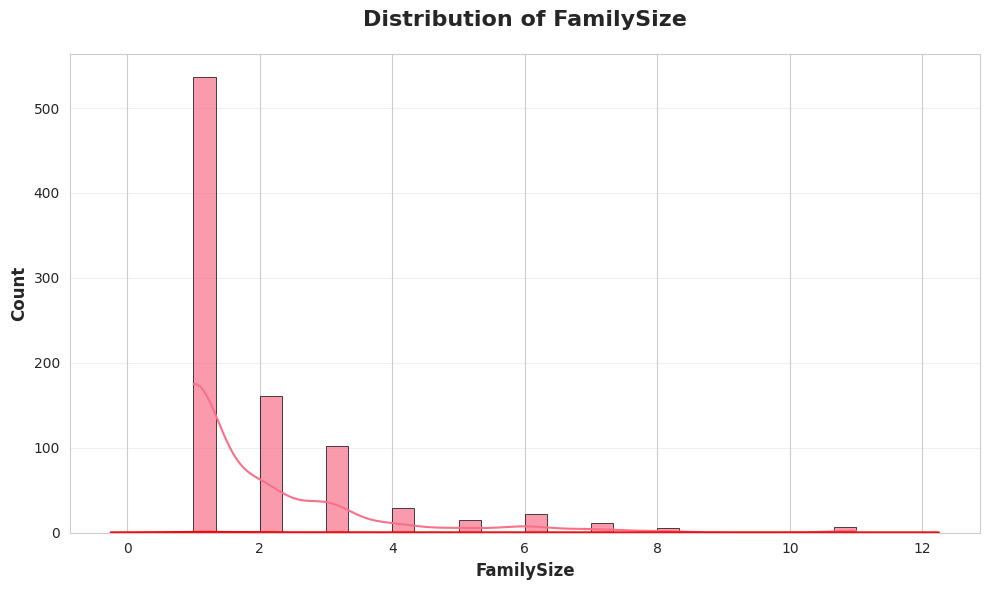

In [33]:
# Set a consistent style and palette for attractiveness
sns.set_style("whitegrid")
sns.set_palette("husl")

# Loop through the numerical columns to create enhanced histograms
num_cols = ['Age', 'Fare', 'FamilySize']
for col in num_cols:
    plt.figure(figsize=(10, 6))  # Set a larger figure size for better visibility
    sns.histplot(df[col], kde=True, bins=30, edgecolor='black', linewidth=0.5, alpha=0.7)  # Add edges and transparency for better visuals

    # Customize title and labels
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel(col, fontsize=12, fontweight='bold')
    plt.ylabel('Count', fontsize=12, fontweight='bold')

    # Customize the KDE line for better appearance
    sns.kdeplot(df[col], color='red', linewidth=2)

    # Add a subtle grid for readability
    plt.grid(axis='y', alpha=0.3)

    # Tight layout to prevent clipping
    plt.tight_layout()
    plt.show()


--------------------------
### Bivariate Analysis (Survival vs Features)

---------------------
<font size =3 color= yellow>Goal: Identify predictive relationships

<font size=4 color=darkorange> Categorical VS Survived

-------------

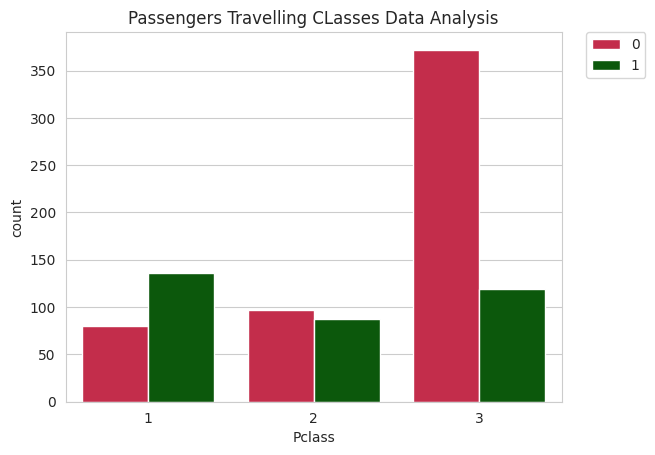

In [34]:
sns.countplot(x='Pclass', hue='Survived', data=df, palette= ['crimson','darkgreen'] )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('Passengers Travelling CLasses Data Analysis')
plt.show()

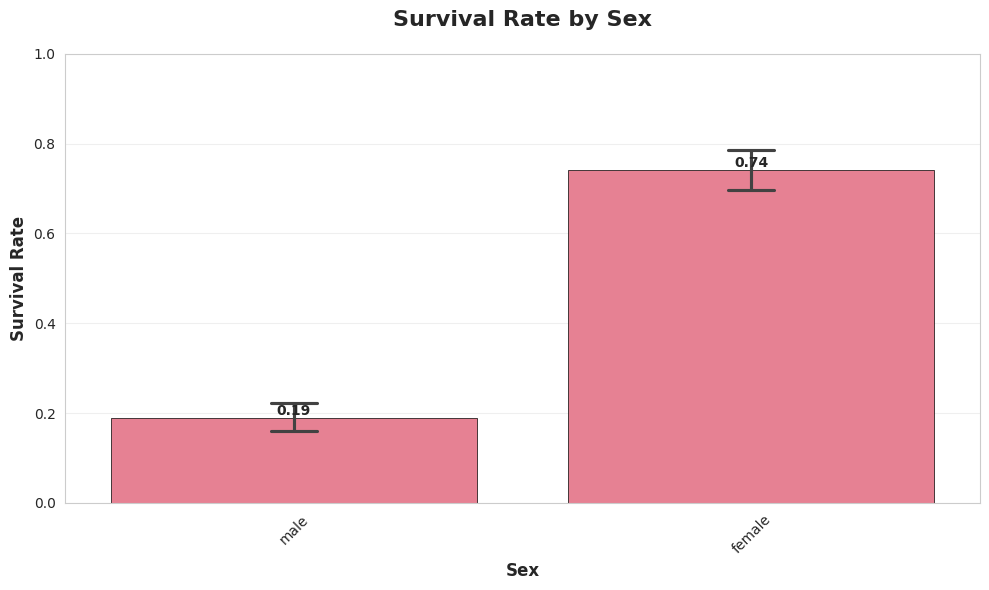

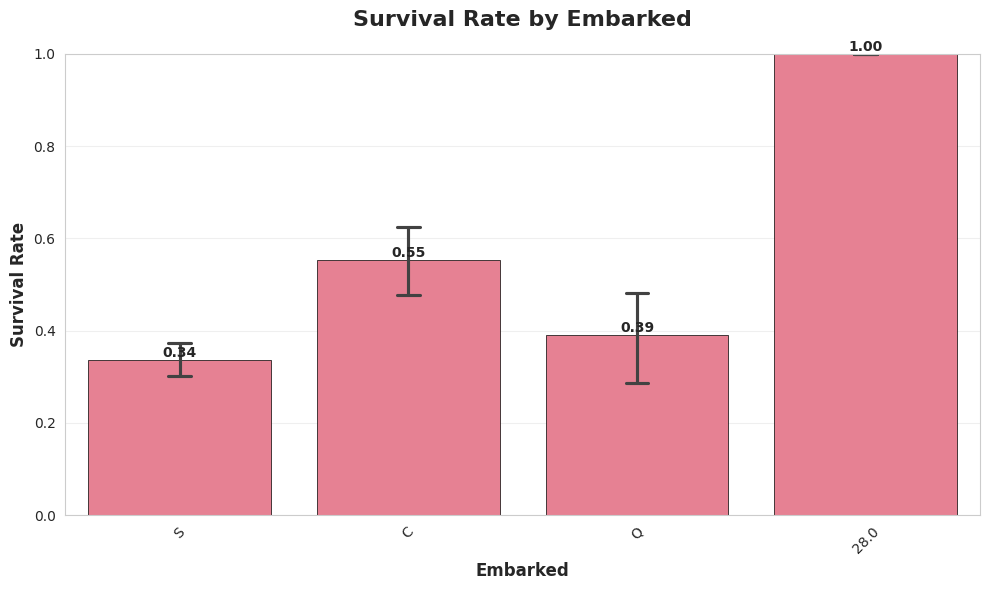

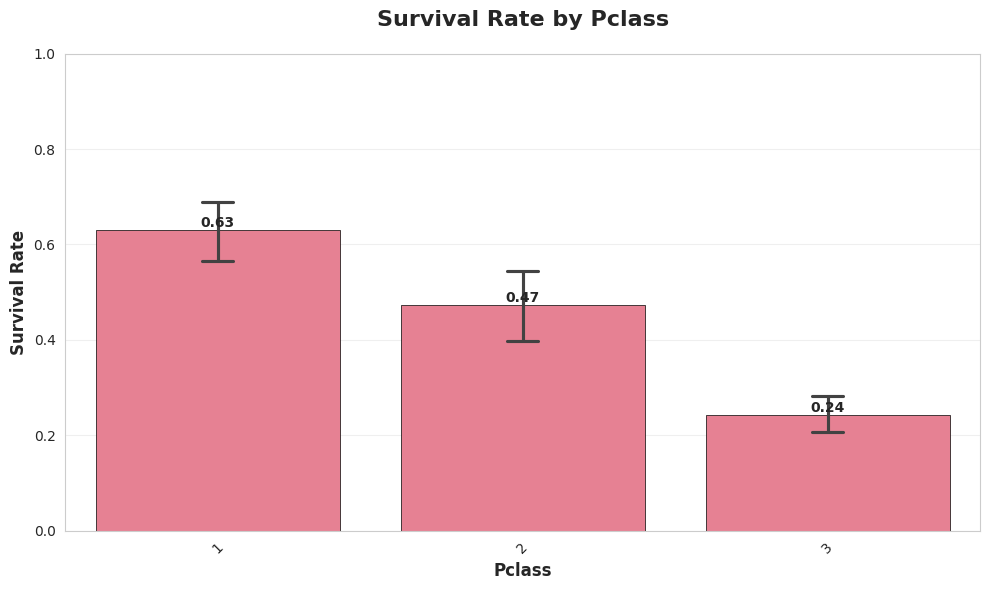

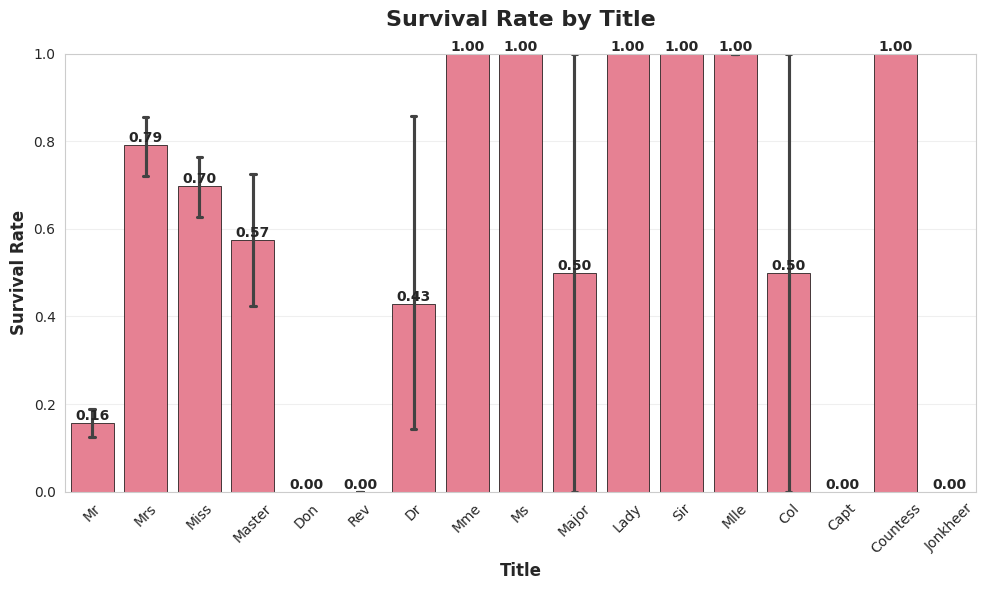

In [35]:
# Loop through the columns to create enhanced bar plots for survival rates
for col in ['Sex', 'Embarked', 'Pclass', 'Title']:
    plt.figure(figsize=(10, 6))  # Set a larger figure size for better visibility
    sns.barplot(x=col, y='Survived', data=df, edgecolor='black', linewidth=0.5, capsize=0.1)  # Add edges and error bars for confidence

    # Customize title and labels
    plt.title(f'Survival Rate by {col}', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel(col, fontsize=12, fontweight='bold')
    plt.ylabel('Survival Rate', fontsize=12, fontweight='bold')

    # Rotate x-labels if needed (useful for longer labels like Embarked or Title)
    plt.xticks(rotation=45)

    # Add value labels on top of bars for clarity
    for p in plt.gca().patches:
        plt.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Add a subtle grid for readability
    plt.grid(axis='y', alpha=0.3)

    # Set y-axis limits for better visualization (0 to 1 for survival rate)
    plt.ylim(0, 1)

    # Tight layout to prevent clipping
    plt.tight_layout()
    plt.show()


<font size=4 color=darkorange> Numerical VS Survived

-------------

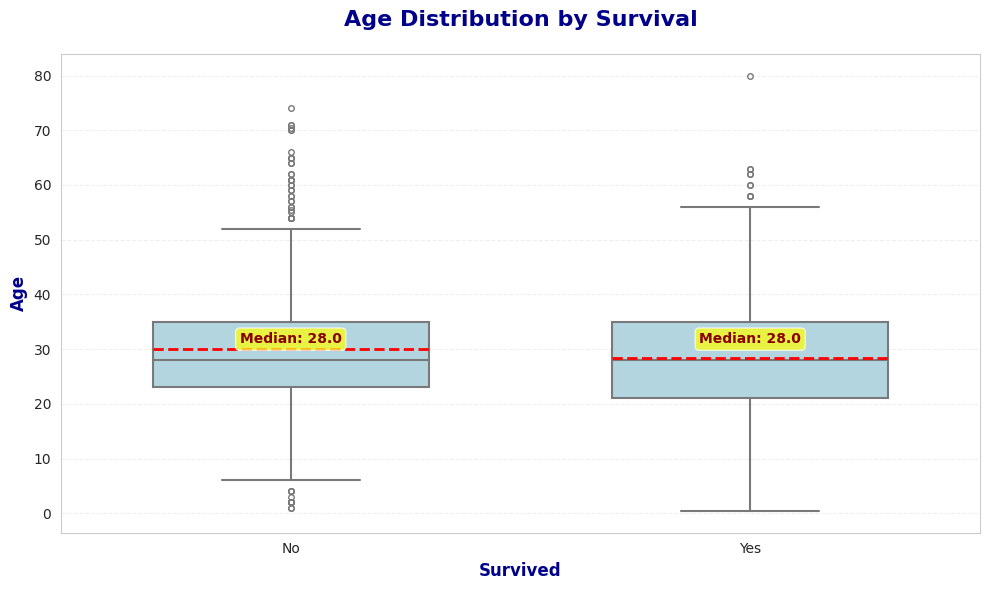

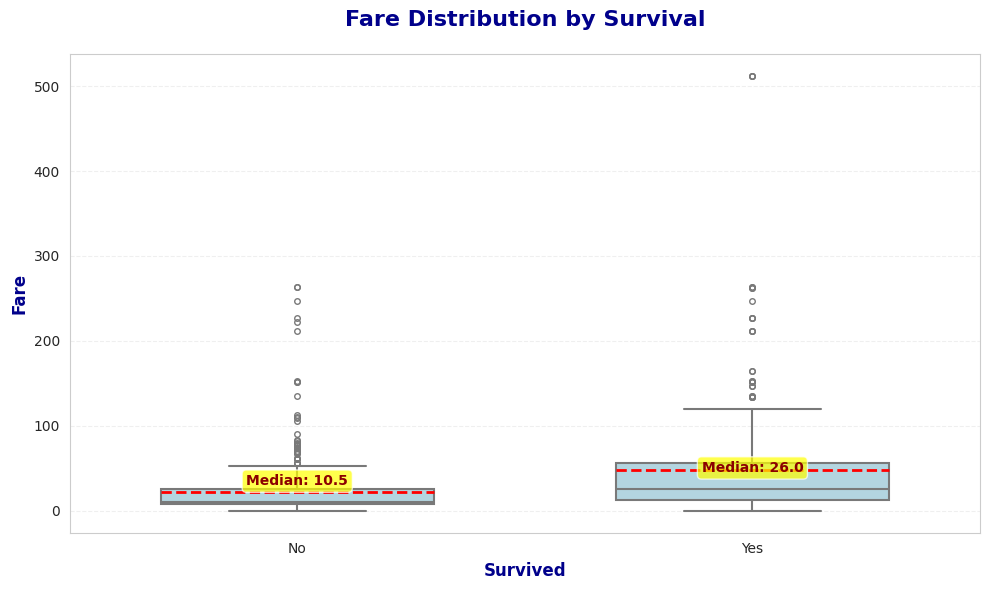

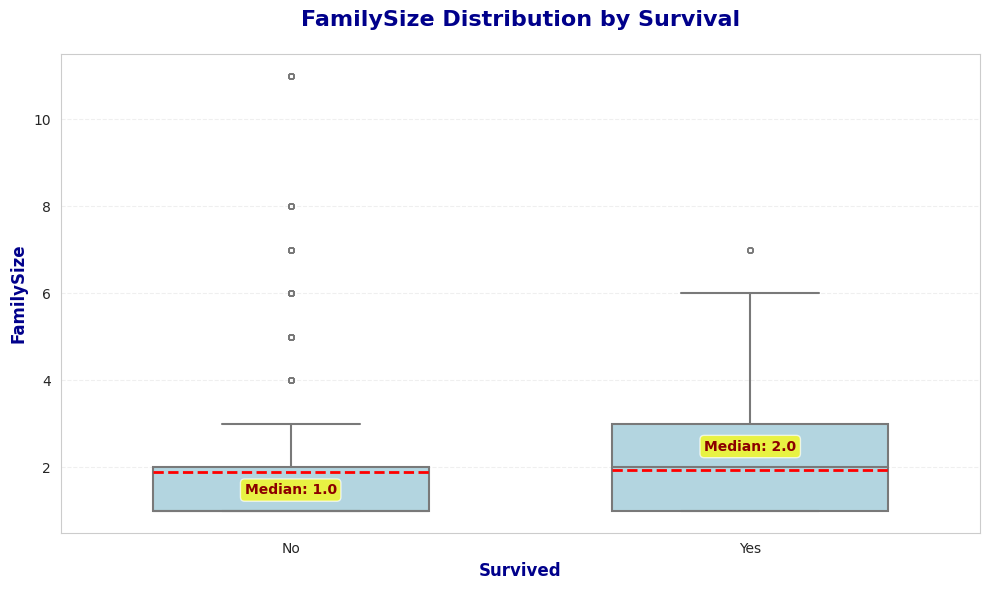

In [36]:
# Set a consistent style and palette for attractiveness
sns.set_style("whitegrid")
sns.set_palette("Set2")  # Using a palette that works well for categorical distinctions

# Loop through the numerical columns to create enhanced box plots for distributions by survival
num_cols = ['Age', 'Fare', 'FamilySize']
for col in num_cols:
    plt.figure(figsize=(10, 6))  # Set a larger figure size for better visibility

    # Create the boxplot with enhancements: use 'color' for fill, linewidth for edges, and show means
    # Avoid 'edgecolor' to prevent compatibility issues; rely on linewidth and color for styling
    ax = sns.boxplot(x='Survived', y=col, data=df,
                     color='lightblue',  # Fill color for boxes
                     linewidth=1.5,  # Line width for box edges (this is supported)
                     width=0.6,
                     showmeans=True,
                     meanline=True,
                     meanprops={'color': 'red', 'linewidth': 2},
                     fliersize=4,
                     saturation=0.8)  # Adjust saturation for a more vibrant look

    # Customize title and labels with improved styling
    plt.title(f'{col} Distribution by Survival', fontsize=16, fontweight='bold', pad=20, color='darkblue')
    plt.xlabel('Survived', fontsize=12, fontweight='bold', color='darkblue')
    plt.ylabel(col, fontsize=12, fontweight='bold', color='darkblue')

    # Customize x-ticks for clarity
    plt.xticks([0, 1], ['No', 'Yes'])

    # Annotate medians on the boxplots for key insights
    medians = df.groupby('Survived')[col].median()
    for i, median in enumerate(medians):
        ax.annotate(f'Median: {median:.1f}',
                    xy=(i, median), xytext=(0, 10),
                    textcoords='offset points', ha='center', va='bottom',
                    fontsize=10, fontweight='bold', color='darkred',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

    # Add a subtle grid for readability
    plt.grid(axis='y', alpha=0.3, linestyle='--')

    # Optional: Cap y-axis at 95th percentile to handle outliers (uncomment if needed)
    # plt.ylim(0, df[col].quantile(0.95))

    # Tight layout to prevent clipping
    plt.tight_layout()
    plt.show()


--------------------------
### Multivariate Analysis

---------------------
<font size =3 color= yellow>Goal: See how multiple features interact with survival

In [37]:
pd.crosstab(df['Sex'], df['Pclass'], values=df['Survived'], aggfunc='mean').style.background_gradient(cmap='coolwarm')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


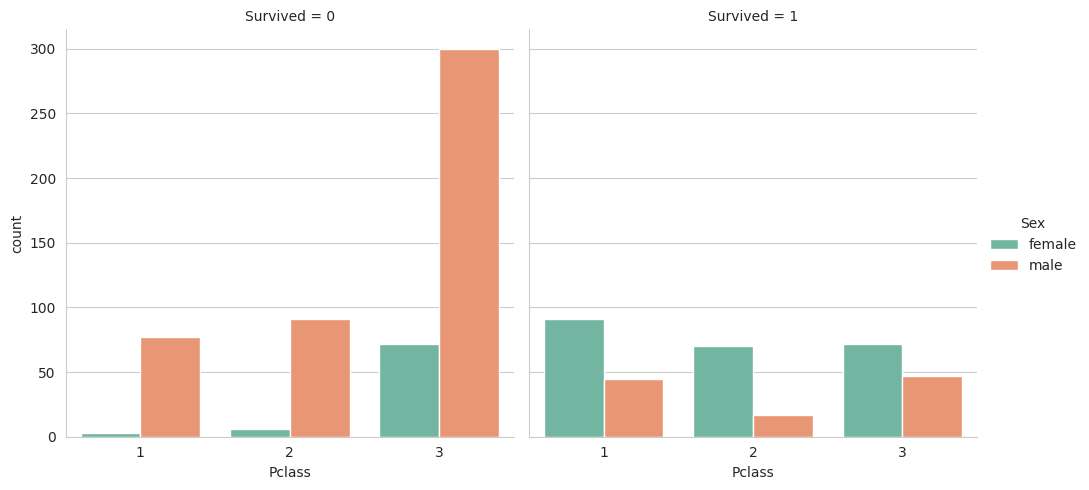

In [38]:
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count')

--------------------------
### Correlation & Feature Relationships

---------------------
<font size =3 color= yellow>Goal: Spot linear relationships, multicollinearity

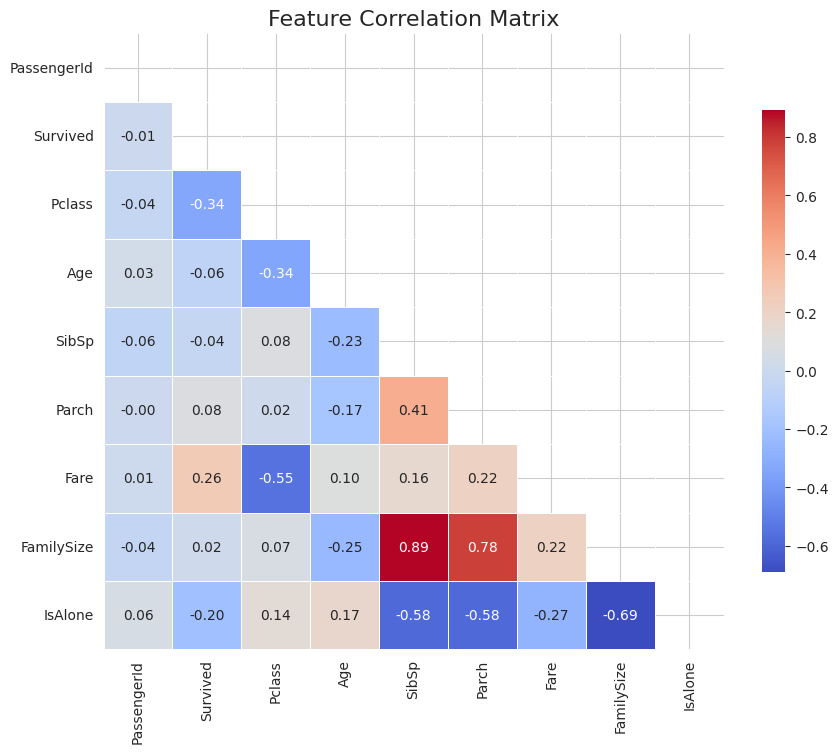

In [39]:
# 1. Calculate the correlation matrix
corr = df.corr(numeric_only=True) # Use numeric_only=True for robustness against non-numeric columns

# 2. Set figure size for better readability
plt.figure(figsize=(10, 8))

# 3. Create a mask to hide the upper triangle (since the matrix is symmetric)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 4. Generate the heatmap with improvements
sns.heatmap(
    corr,
    mask=mask,               # Apply the mask
    annot=True,              # Show correlation values
    cmap='coolwarm',         # Colormap
    fmt=".2f",               # Format to 2 decimal places
    linewidths=.5,           # Add lines between cells
    cbar_kws={"shrink": .75} # Adjust the size of the color bar
)

# 5. Add a professional title and display
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

# Optional: To save the figure
# plt.savefig('correlation_heatmap.png', bbox_inches='tight')

<Figure size 1000x1000 with 0 Axes>

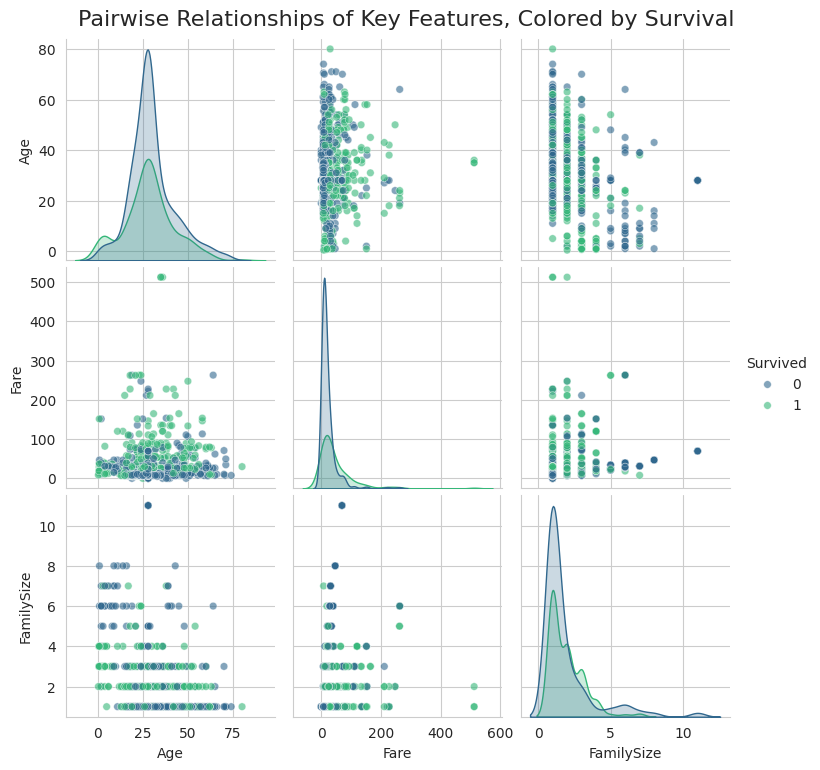

In [40]:
# 1. Define variables and settings
cols_to_plot = ['Survived', 'Age', 'Fare', 'FamilySize']
hue_var = 'Survived'

# 2. Set the figure size using a custom parameter to make dots clearer
plt.figure(figsize=(10, 10))

# 3. Generate the pairplot with enhancements
g = sns.pairplot(
    data=df[cols_to_plot].dropna(), # Drop NaNs only for the columns being plotted for robustness
    vars=[c for c in cols_to_plot if c != hue_var], # Plot only the continuous variables
    hue=hue_var,
    diag_kind='kde',                 # Use Kernel Density Estimate for diagonal (smoother)
    palette='viridis',               # Use a different, often better, color palette
    plot_kws={'alpha': 0.6, 's': 30}, # Adjust transparency and size of scatter points
    height=2.5                       # Control the size of each subplot
)

# 4. Add a title for context
g.fig.suptitle('Pairwise Relationships of Key Features, Colored by Survival',
               y=1.02, fontsize=16)
plt.show()